###Import e configuração de recursos

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set()
plt.ion()
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (15,9)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [17]:
hpn = pd.read_csv('https://raw.githubusercontent.com/BernnardoSBO/ICD-TrabalhoFinal/master/databases/world-happiness-clean.csv')
hpn.head(1)

,Nome do País,Nota para Escada de Cantril,Log do PIB per capita,Suporte Social,Expectativa de Vida Saúdavel,Liberdade para Escolhas da Vida,Generosidade,Percepção de Corrupção,Ano
0,Afghanistan,4.758,7.647,0.539,51.6,0.6,0.121,0.707,2010


#Implementação de Métodos Úteis

##Bootstrap

In [18]:
def bootstrap_mean(x, n=5000):
  size = len(x)
  values  = np.zeros(n)
  for i in range(n):
    sample = np.random.choice(x,size=size,replace=True)
    values[i] = sample.mean()
  return values

#Testes de Hipótese

##Teste I: Influência de PIB per capita em Expectativa de Vida Saudável

Para fazermos esse estudo, iremos separa as observações do nosso conjunto de dados em duas categorias:
<ul>
<li>
Grupo que tem 50% das observações correspondentes àquelas com menor PIB per capita
</li>
<li>
Grupo que tem 50% das observações correspodentes àquelas com maior PIB per capita

In [19]:
mdPib= np.percentile(hpn['Log do PIB per capita'], 50)
maiores_pibs = hpn['Log do PIB per capita'] > mdPib
menores_pibs = hpn['Log do PIB per capita'] < mdPib

###Visualização na amostra

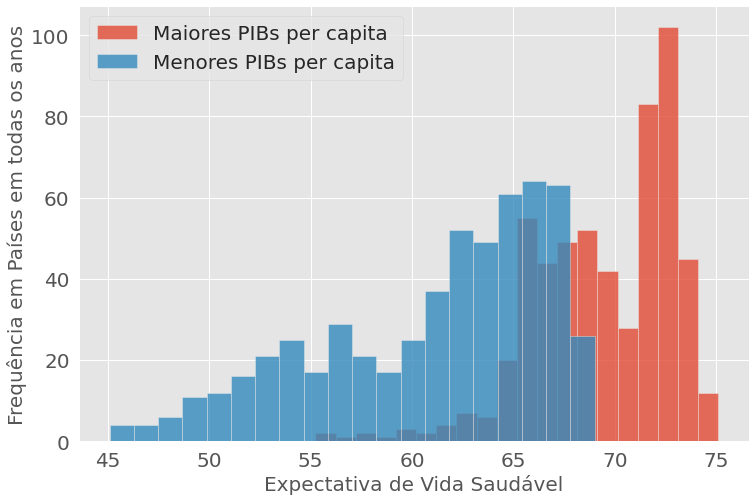

In [20]:
fig,ax = plt.subplots(figsize=(12,8))

ax.hist(hpn[maiores_pibs]['Expectativa de Vida Saúdavel'], alpha=0.8, label='Maiores PIBs per capita', bins=20)
ax.hist(hpn[menores_pibs]['Expectativa de Vida Saúdavel'], alpha=0.8, label='Menores PIBs per capita', bins=20)
plt.xlabel('Expectativa de Vida Saudável')
plt.ylabel('Frequência em Países em todas os anos')
ax.legend()
plt.show()

###Hipótese

<ul><li>Hipótese nula: Maiores PIBs per capita não afetam a expectativa de vida Saudável</li>
<li>
Hipótese alternativa: Maiores PIBs per capita afetam a expectativa de vida Saudável
</li>
</ul>

In [21]:
medBootMaior = bootstrap_mean(hpn[maiores_pibs]['Expectativa de Vida Saúdavel'])
medBootMenor = bootstrap_mean(hpn[menores_pibs]['Expectativa de Vida Saúdavel'])

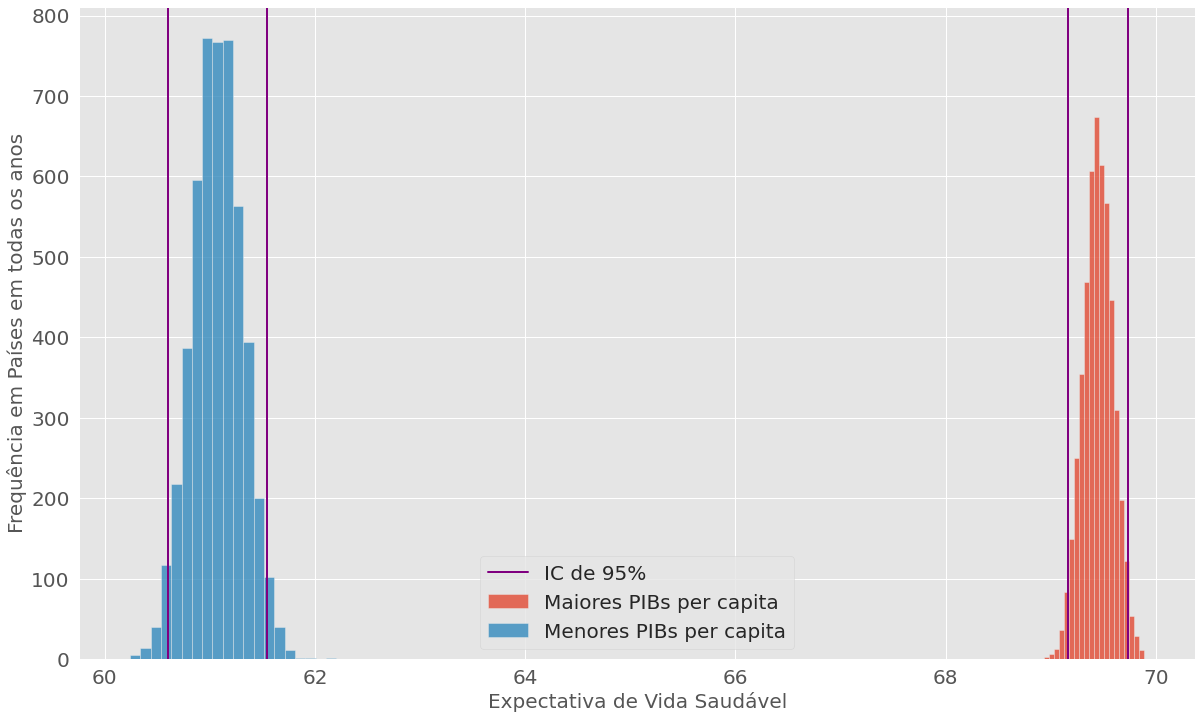

In [22]:
ic25maior = np.percentile(medBootMaior, 2.5)
ic975maior = np.percentile(medBootMaior, 97.5)
ic25menor = np.percentile(medBootMenor, 2.5)
ic975menor = np.percentile(medBootMenor, 97.5)

fig,ax = plt.subplots(figsize=(20,12))

ax.hist(medBootMaior, alpha=0.8, label='Maiores PIBs per capita', bins=20)
ax.hist(medBootMenor, alpha=0.8, label='Menores PIBs per capita', bins=20)
plt.axvline(x=ic25maior,color='purple', linewidth=2, label='IC de 95%')
plt.axvline(x=ic975maior,color='purple', linewidth=2)
plt.axvline(x=ic25menor, color='purple', linewidth=2)
plt.axvline(x=ic975menor, color='purple', linewidth=2)
plt.xlabel('Expectativa de Vida Saudável')
plt.ylabel('Frequência em Países em todas os anos')
plt.title('')

ax.legend()
plt.show()

###Conclusão Teste I

<p>Em um primeiro momento, quando observamos a distribuição dos países com maior e menor PIB per capita referente a expectativa de vida saúdavel, é possível enxergar uma leve tendência como observada no primeiro gráfico. Contudo, existe também uma grande sobreposição de valores entre os dois grupos. Isso nós faz indagar se realmente essa tendência existe ou então se foi apenas resultado do acaso.</p>
<br/>
<p>
No entanto, quando realizamos um teste de hipótese com o uso de bootstrap, observamos que em um intervalo de confiança de 95%, essas amostras não apresentam sobreposição. Portando, podemos dizer que <i><b>95% das amostras que tirarmos dos dois grupos irão com certeza apresentar médias que não se sobrepõem</b></i>
</p>

##Teste II: Influência do PIB per capita em Nota para Escada de Cantril(Índice de Felicidade)

Para fazermos esse estudo, iremos separa as observações do nosso conjunto de dados em duas categorias:
<ul>
<li>
Grupo que tem 50% das observações correspondentes àquelas com menor PIB per capita
</li>
<li>
Grupo que tem 50% das observações correspodentes àquelas com maior PIB per capita

In [23]:
mdPib= np.percentile(hpn['Log do PIB per capita'], 50)
maiores_pibs = hpn['Log do PIB per capita'] > mdPib
menores_pibs = hpn['Log do PIB per capita'] < mdPib

###Visualização na amostra

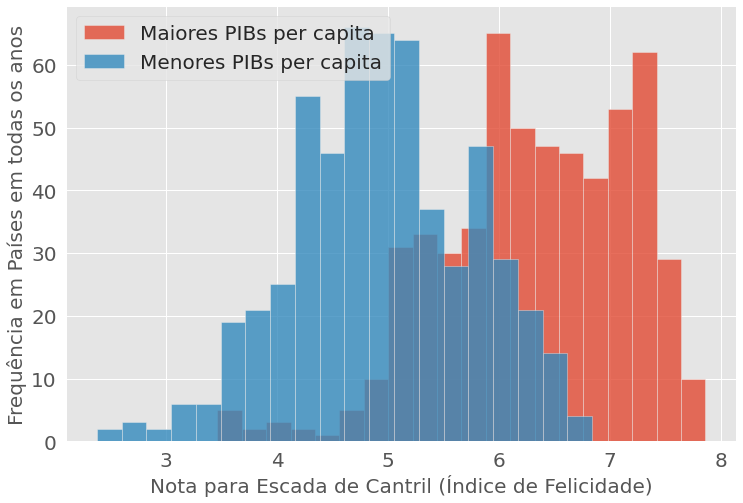

In [24]:
fig,ax = plt.subplots(figsize=(12,8))

ax.hist(hpn[maiores_pibs]['Nota para Escada de Cantril'], alpha=0.8, label='Maiores PIBs per capita', bins=20)
ax.hist(hpn[menores_pibs]['Nota para Escada de Cantril'], alpha=0.8, label='Menores PIBs per capita', bins=20)
plt.xlabel('Nota para Escada de Cantril (Índice de Felicidade)')
plt.ylabel('Frequência em Países em todas os anos')
ax.legend()
plt.show()

###Hipótese

<ul><li>Hipótese nula: Maiores PIBs per capita não afetam o quão uma pessoa é feliz</li>
<li>
Hipótese alternativa: Maiores PIBs per capita afetam o quão uma pessoa é feliz
</li>
</ul>

In [25]:
medBootMaior = bootstrap_mean(hpn[maiores_pibs]['Nota para Escada de Cantril'])
medBootMenor = bootstrap_mean(hpn[menores_pibs]['Nota para Escada de Cantril'])

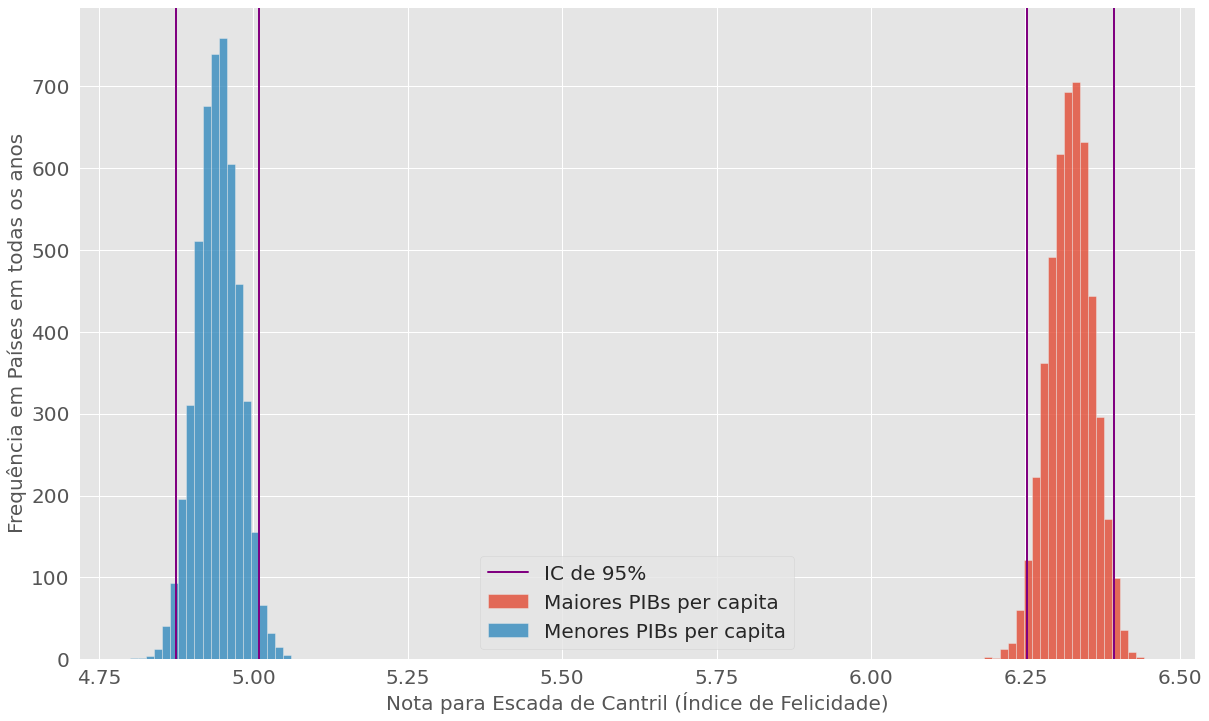

In [15]:
ic25maior = np.percentile(medBootMaior, 2.5)
ic975maior = np.percentile(medBootMaior, 97.5)
ic25menor = np.percentile(medBootMenor, 2.5)
ic975menor = np.percentile(medBootMenor, 97.5)

fig,ax = plt.subplots(figsize=(20,12))

ax.hist(medBootMaior, alpha=0.8, label='Maiores PIBs per capita', bins=20)
ax.hist(medBootMenor, alpha=0.8, label='Menores PIBs per capita', bins=20)
plt.axvline(x=ic25maior,color='purple', linewidth=2, label='IC de 95%')
plt.axvline(x=ic975maior,color='purple', linewidth=2)
plt.axvline(x=ic25menor, color='purple', linewidth=2)
plt.axvline(x=ic975menor, color='purple', linewidth=2)
plt.xlabel('Nota para Escada de Cantril (Índice de Felicidade)')
plt.ylabel('Frequência em Países em todas os anos')

ax.legend()
plt.show()

###Conclusão Teste II

<p>Assim como no Teste I, observamos a distribuição de países com maior e menor PIB per capita referente a Nota para Escada de Cantril(Índice de Felicidade).</p>
<p>
É possível enxergar no primeiro gráfico que mesmo os valores tendendo para uma diferença entre eles, existe uma sobreposição de valores entre os dois grupos.
</p>
<p>
No entanto, quando realizamos o teste de hipótese através do uso do bootstrap, observamos que em um intervalo de 95% em cada amostra dos diferentes grupos, não existe sobreposição dos valores para a Nota para Escada de Cantril entre esses grupos, isso dado um intervalo de confiaça de 95%. Logo <i><b>95% das amostras que tirarmos dos dois grupos irão com certeza apresentar médias que não se sobrepõem</b></i>
</p>